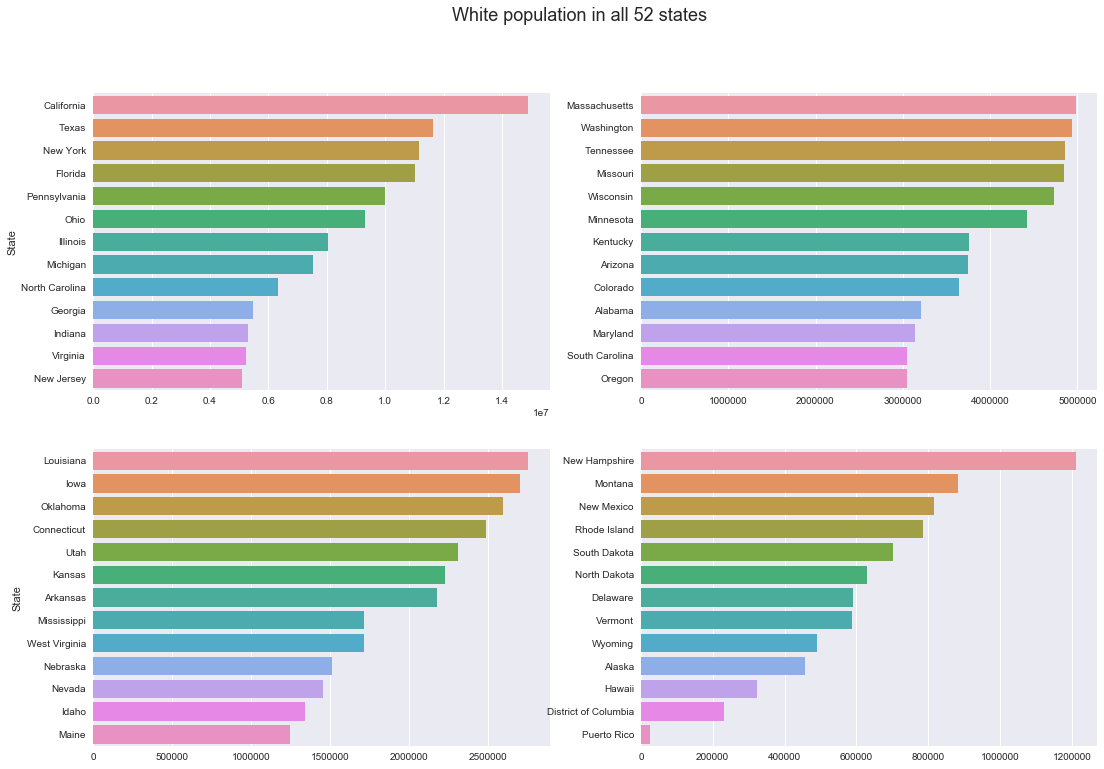

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

census = pd.read_csv("../../data/census/census_county.csv")

races = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

# Creating a total population column for each race
# FIXME: this feels inefficient.  Does Pandas have another option?
for race in races:
    census[race + "_pop"] = (census[race] * census.TotalPop) / 100

# current racial population being plotted
race = races[1]

# Sum the populations in each state
race_pops = census.groupby("State")[race + "_pop"].sum().sort_values(ascending=False)

#### Plotting the results for each state

fig, axarr = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("{} population in all 52 states".format(race), fontsize=18)

# Splitting the plot into 4 subplots so I can fit all 52 States
data = race_pops.head(13)
sns.barplot(x=data.values, y=data.index, ax=axarr[0][0])

data = race_pops.iloc[13:26]
sns.barplot(x=data.values, y=data.index, ax=axarr[0][1]).set(ylabel="")

data = race_pops.iloc[26:39]
sns.barplot(x=data.values, y=data.index, ax=axarr[1][0])

data = race_pops.tail(13)
_ = sns.barplot(x=data.values, y=data.index, ax=axarr[1][1]).set(ylabel="")